# 딥러닝 CNN을 통한 regression

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/Administrator/dataset/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [4]:
# One-hot encoding for the 'Sex' column
df_encoded = pd.get_dummies(df, columns=['Sex'])

# Display the first few rows after encoding
df_encoded.head()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [5]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [6]:
df = df.drop(columns=['Sex']) # Sex 특성 제거

df['Rings'] = LabelEncoder().fit_transform(df['Rings'])

df.head(20)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,14
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,6
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,8
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,7
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,19
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,15
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,8


In [7]:
X=df_encoded.drop('Rings',axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [8]:
y=df['Rings']
y.value_counts()

8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
26      2
23      2
0       1
25      1
27      1
1       1
24      1
Name: Rings, dtype: int64

In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Normalize the data (CNN and LSTM models often perform better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Display the preprocessed features and target
X_train_scaled[:5], y[:5]

(array([[ 0.21017452,  0.36972535, -0.34795017, -0.32316418, -0.32540694,
         -0.40512998, -0.21213236, -0.67464018,  1.45186328, -0.75890935],
        [-0.41944448, -0.5423862 , -0.93608206, -0.66598541, -0.48012641,
         -0.82093157, -0.71241871, -0.67464018,  1.45186328, -0.75890935],
        [-1.84658088, -1.85988065, -1.64184034, -1.3882497 , -1.35462776,
         -1.34639511, -1.39137875,  1.48227163, -0.68877009, -0.75890935],
        [-2.09842848, -2.11324497, -1.75946671, -1.45335522, -1.36359701,
         -1.53373429, -1.46284823, -0.67464018,  1.45186328, -0.75890935],
        [-0.25154608, -0.28902188, -0.11269741, -0.40963244, -0.43752249,
         -0.350299  , -0.17639762, -0.67464018, -0.68877009,  1.31768044]]),
 id
 0    14
 1     6
 2     8
 3     9
 4     6
 Name: Rings, dtype: int64)

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model for regression
model = models.Sequential()

# Add 1D Convolutional layers
model.add(layers.Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_test_scaled.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(32, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output and add Dense layers for regression
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 9, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 3, 32)               │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,545 (33.38 KB)

 Trainable params: 8,545 (33.38 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 모델 훈련
model_history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 61.1003 - mae: 6.8292 - val_loss: 8.6034 - val_mae: 2.1794
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8063 - mae: 2.0175 - val_loss: 7.3152 - val_mae: 1.9218
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6324 - mae: 1.9472 - val_loss: 6.9183 - val_mae: 1.8856
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0070 - mae: 2.0392 - val_loss: 6.7280 - val_mae: 1.8420
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9241 - mae: 1.9115 - val_loss: 6.5325 - val_mae: 1.8608
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1737 - mae: 1.9566 - val_loss: 6.8014 - val_mae: 2.0487
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7446 - mae: 1.9195 - val_loss: 6.2891 - val_mae: 1.7987
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8058 - mae: 1.9237 - val_loss: 6.1145 - val_mae: 1.8180
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6689 - mae:

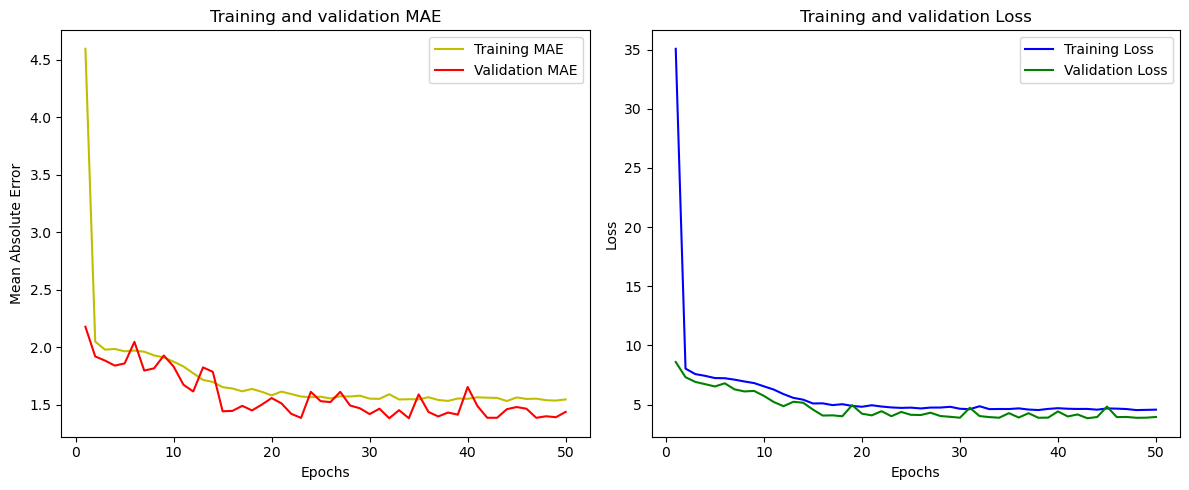

In [14]:
# MAE 그래프
mae = model_history.history['mae']
val_mae = model_history.history['val_mae']
epochs = range(1, len(mae) + 1)  # epochs 범위 설정

# 손실 그래프
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure(figsize=(12, 5))

# MAE 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, mae, 'y', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_test_scaled)

# 예측값이 회귀 문제라면 y_pred를 그대로 사용합니다.
# 예측값을 평가합니다.
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error: 22.507972965729117
Mean Absolute Error: 3.5928399512927496
R^2 Score: -1.0792181279628759
